In [1]:
from typing import List, Dict, Union
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib as kl
import missingno as mns
import os
import warnings


os.environ['KERAS_BACKEND']='tensorflow'
os.environ["CUDA_VISIBLE_DE VICES"]="0"
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['Kaiti']
plt.rcParams['axes.unicode_minus'] = False
PIC_PATH = "../../models/image/cleaning/"
DATA_PATH = '../../data/data/'
RESULT_PATH = '../../data/summary/cleaning/'
MODEL_PATH = '../../models/cleaning/'

In [2]:
import pathlib2 as pl2
import shutil

def creat_dir():
    pic_path = pl2.Path(PIC_PATH)
    if os.path.exists(PIC_PATH):
        shutil.rmtree(PIC_PATH)
    pic_path.mkdir(parents=True, exist_ok=True)
    if not os.path.exists(RESULT_PATH):
        os.mkdir(RESULT_PATH)
    if not os.path.exists(MODEL_PATH):
        os.mkdir(MODEL_PATH)

creat_dir()

In [3]:
figure_count = 0

def create_figure(figure_name: str, dpi=800):
    global figure_count
    figure_count += 1
    plt.savefig(PIC_PATH + f'/figure{figure_count}_{figure_name}.png', dpi=dpi)

In [4]:
data = pd.read_csv(DATA_PATH + '附件2.csv',  encoding='gb2312')
data

方向                       时间       车牌号      交叉口
0         3  2024-04-03T14:39:08.632  AF5B7CEM  环西路-纬中路
1         1  2024-04-03T17:45:32.316   BK2IA84  环西路-纬中路
2         3  2024-04-03T15:09:04.087  AF4EC7FK  环西路-纬中路
3         2  2024-04-03T11:49:03.665   AF4MBB6  环西路-纬中路
4         3  2024-04-01T11:47:49.391   CBA7KCG  环西路-纬中路
...      ..                      ...       ...      ...
8844991   2  2024-05-06T19:03:30.000       无车牌  经中路-环南路
8844992   1  2024-05-04T12:21:28.000       无车牌  经中路-环南路
8844993   1  2024-05-06T16:55:47.000       无车牌  经中路-环南路
8844994   2  2024-05-06T07:30:43.000       无车牌  经中路-环南路
8844995   2  2024-05-06T14:12:02.000       无车牌  经中路-环南路

[8844996 rows x 4 columns]

In [5]:
# 索引设置为时间
data.index = data['时间']
# 按时间和车牌号排序
data.drop(['时间', '车牌号'], axis=1, inplace=True)
# 索引转换为时间格式
data.index = pd.to_datetime(data.index)
# 按方向进行分组
group = data.query('交叉口 == "经中路-纬中路"').groupby('方向')

In [6]:
unique = data['方向'].unique()
dct = dict()
for i in unique:
    dct[i] = group.get_group(i).resample('h').count().drop('方向', axis=1)
    dct[i].columns = ['车流量']
    dct[i].to_csv(RESULT_PATH + f'经中路-纬中路-{i}.csv')
dct

{3:                      车流量
 时间                      
 2024-04-01 00:00:00   52
 2024-04-01 01:00:00   47
 2024-04-01 02:00:00   30
 2024-04-01 03:00:00   24
 2024-04-01 04:00:00   29
 ...                  ...
 2024-05-06 19:00:00  299
 2024-05-06 20:00:00  221
 2024-05-06 21:00:00  190
 2024-05-06 22:00:00  115
 2024-05-06 23:00:00   91
 
 [864 rows x 1 columns],
 1:                      车流量
 时间                      
 2024-04-01 00:00:00  114
 2024-04-01 01:00:00   76
 2024-04-01 02:00:00   33
 2024-04-01 03:00:00   14
 2024-04-01 04:00:00   23
 ...                  ...
 2024-05-06 19:00:00  532
 2024-05-06 20:00:00  451
 2024-05-06 21:00:00  341
 2024-05-06 22:00:00  239
 2024-05-06 23:00:00  166
 
 [864 rows x 1 columns],
 2:                      车流量
 时间                      
 2024-04-18 16:00:00  412
 2024-04-18 17:00:00  277
 2024-04-18 18:00:00  431
 2024-04-18 19:00:00  344
 2024-04-18 20:00:00  394
 ...                  ...
 2024-05-06 19:00:00  300
 2024-05-06 20:00:00  298
 

In [7]:
ordinal = pd.read_excel(DATA_PATH + '附件1.xlsx', sheet_name=0, index_col=0)
ordinal = ordinal['方向']
ordinal = ordinal.to_dict()
ordinal

{1: '由东向西', 2: '由西向东', 3: '由南向北', 4: '由北向南'}

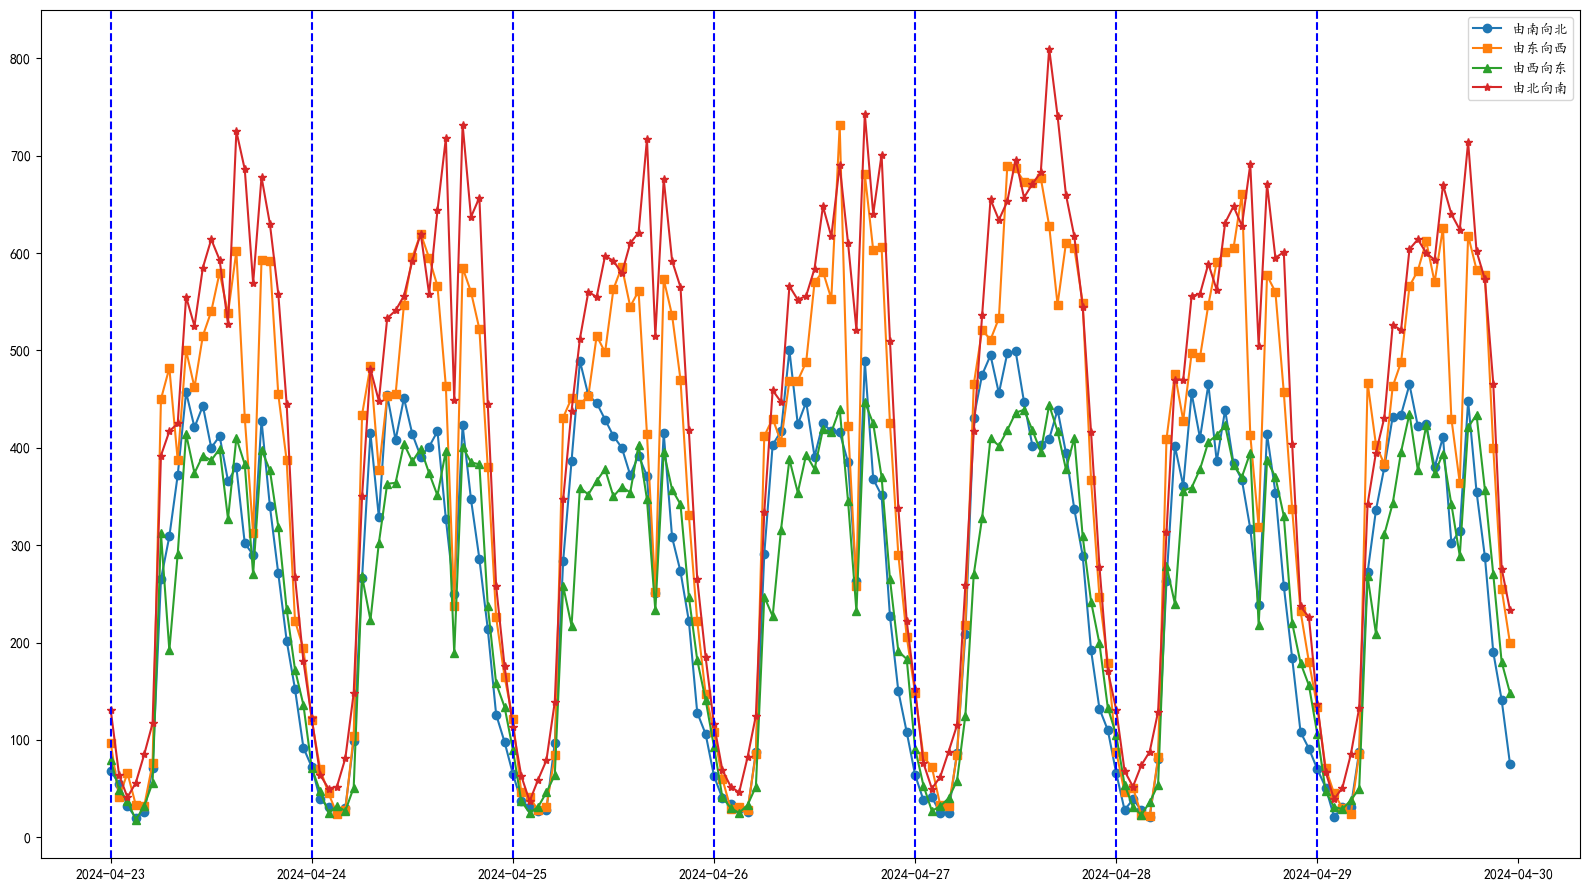

In [8]:
plt.figure(figsize=(16, 9))

for i, style in zip(unique, ('-o', '-s', '-^', '-*')):
    plt.plot(dct[i][dct[i].index < '2024-04-30'][-24 * 7: ], style, label=ordinal.get(i))

line = dct[1][dct[1].index < '2024-04-30'][-24 * 7: ].index[::24]
for xc in line:
    plt.axvline(x=xc, color='blue', linestyle='--')

plt.legend()
plt.tight_layout()
create_figure('query_time')

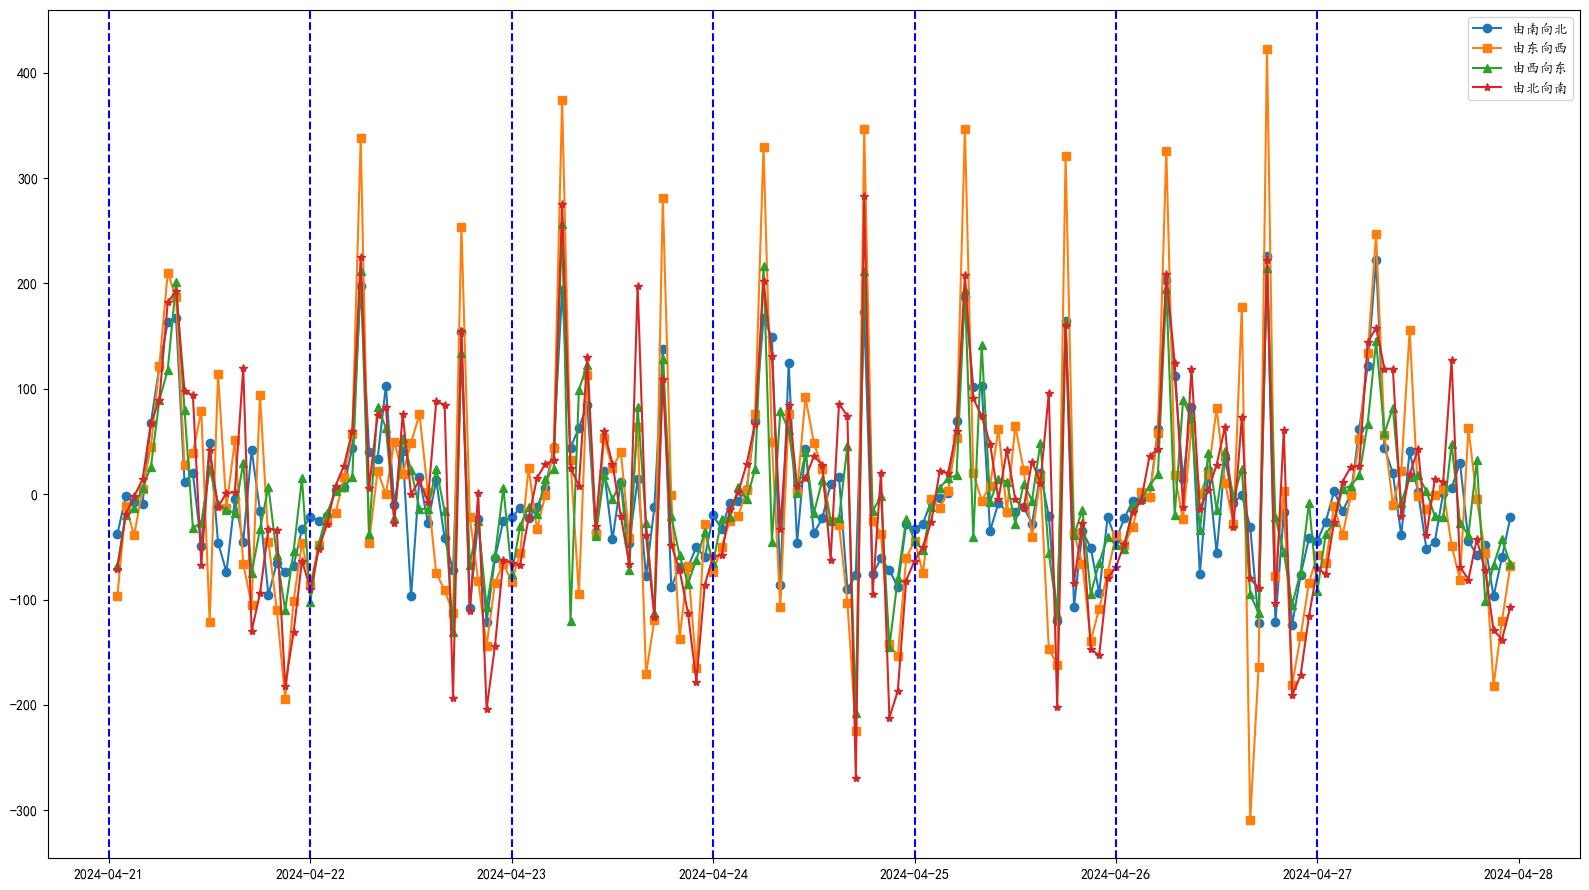

In [9]:
plt.figure(figsize=(16, 9))

for i, style in zip(unique, ('-o', '-s', '-^', '-*')):
    plt.plot(dct[i][dct[i].index < '2024-04-28'][-24 * 7: ].diff(), style, label=ordinal.get(i))
    
line = dct[1][dct[1].index < '2024-04-28'][-24 * 7: ].index[::24]
for xc in line:
    plt.axvline(x=xc, color='blue', linestyle='--')
    
plt.legend()
plt.tight_layout()
create_figure('query_time_diff')

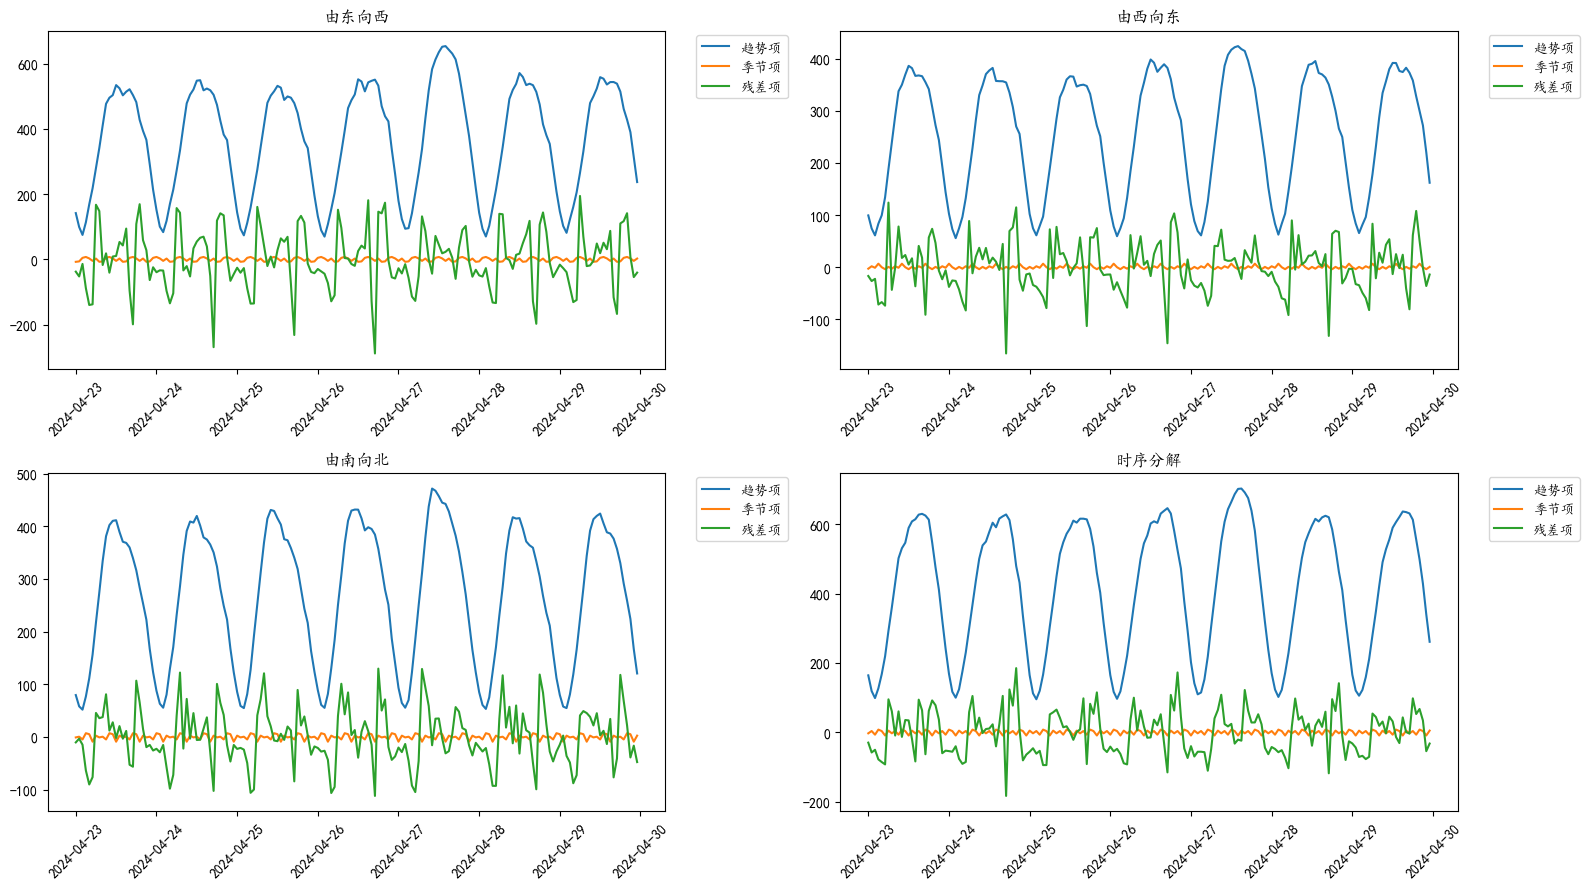

In [10]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose

fig = plt.figure(figsize=(16, 9))

for i in unique:
    sd = seasonal_decompose(dct[i], model='additive', period=7)
    df = pd.DataFrame()
    df['trend'] = sd.trend
    df['seasonal'] = sd.seasonal
    df['resid'] = sd.resid
    df.to_csv(RESULT_PATH + f'seasonal_{i}.csv')
    ax = fig.add_subplot(2, 2, i)
    ax.plot(sd.trend[sd.trend.index < '2024-04-30'][-24 * 7:], label='趋势项')
    ax.plot(sd.seasonal[sd.trend.index < '2024-04-30'][-24 * 7:], label='季节项')
    ax.plot(sd.resid[sd.trend.index < '2024-04-30'][-24 * 7:], label='残差项')
    plt.title(ordinal.get(i))
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 0.8), loc=3, borderaxespad=0)
    plt.tight_layout()
plt.title('时序分解')
create_figure('seasonal_decompose')